# Number of Public Schools

The number of public schools in a neighborhood is an important indicator of community infrastructure and access to education. Neighborhoods with more schools typically offer families greater choice, shorter travel distances, and more distributed student populations. However, the raw count of schools alone does not tell the full story. When comparing neighborhoods of different sizes, it is more meaningful to look at the number of schools relative to the area which I expressed as schools per square mile. This helps identify which neighborhoods have the greatest educational density and which may be underserved, making it a useful metric in evaluating overall neighborhood quality and accessibility.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import fpsnippets

# Load your pogo station dataset
school_data = pd.read_csv("pps_schoolsapr2019publish.csv")
area_df = pd.read_csv("neighborhoods.csv")
area_df = area_df.rename(columns={"hood": "Neighborhood"})


# Define converter function
def latlon_to_neighborhood(row):
    return fpsnippets.geo_to_neighborhood(row['latitude'], row['longitude'])

# Apply conversion to each row
school_data['Neighborhood'] = school_data.apply(latlon_to_neighborhood, axis=1)

# Show first rows
school_data.head(102)

,sourcedid,name,address,city,state,zip,latitude,longitude,Neighborhood
0,9861,Allderdice Early Headstart,2409 Shady Avenue,Pittsburgh,PA,15217,40.429415,-79.919132,Squirrel Hill South
1,301,Allderdice High School,2409 SHADY AVE,PITTSBURGH,PA,15217,40.429416,-79.919370,Squirrel Hill South
2,204,Allegheny 6-8,810 ARCH ST,PITTSBURGH,PA,15212,40.453231,-80.008655,Allegheny Center
3,9863,Allegheny Early Childhood,810 ARCH STREET,Pittsburgh,PA,15212,40.453266,-80.008600,Allegheny Center
4,102,Allegheny K-5,810 ARCH ST,PITTSBURGH,PA,15212,40.453181,-80.008895,Allegheny Center
...,...,...,...,...,...,...,...,...,...
97,9865,Westwood Early Childhood,508 Shadyhill Road,Pittsburgh,PA,15205,40.431587,-80.050871,Westwood
98,186,Westwood K-5,508 SHADYHILL RD,PITTSBURGH,PA,15205,40.431898,-80.051172,Westwood
99,187,Whittier K-5,150 MERIDAN ST,PITTSBURGH,PA,15211,40.435852,-80.018955,Duquesne Heights
100,9864,Woolslair Early Childhood,501 40th Street,Pittsburgh,PA,15224,40.463226,-79.957101,Bloomfield


In [2]:
school_counts = school_data['Neighborhood'].value_counts()

# Convert to DataFrame and rename the column
school_counts_df = school_counts.rename_axis('Neighborhood').reset_index(name='Number of Schools')

school_counts_df



,Neighborhood,Number of Schools
0,Squirrel Hill South,6
1,Allegheny Center,6
2,Beechview,5
3,Brookline,5
4,Carrick,5
5,East Liberty,4
6,Manchester,4
7,Brighton Heights,3
8,Crafton Heights,3
9,North Oakland,3


The other metric we have used is the concentration of schools. We defined it as the number of schools the neighborhood encapsulates in its respectable area. So we merged the area of the neighborhood with the number of schools it has to determine the concentration of the schools in the area.

In [3]:
merged = school_counts_df.merge(area_df, on="Neighborhood", how="left")
# merged.head(1)


In [4]:

merged["schools_per_sq_mi"] = merged["Number of Schools"] / merged["sqmiles"]
final_df = merged[[
    "Neighborhood",
    "Number of Schools",
    "sqmiles",
    "schools_per_sq_mi"
]]
final_df.head(46).sort_values(
    by="schools_per_sq_mi",
    ascending=False
)




,Neighborhood,Number of Schools,sqmiles,schools_per_sq_mi
1,Allegheny Center,6,0.208937,28.716815
13,Mt. Oliver,2,0.103298,19.361549
26,Friendship,2,0.106191,18.833915
6,Manchester,4,0.279049,14.334423
25,Homewood West,2,0.195203,10.245731
10,Lower Lawrenceville,3,0.429944,6.977651
30,Allegheny West,1,0.144794,6.906349
5,East Liberty,4,0.581379,6.880194
20,Allentown,2,0.296998,6.734046
17,Middle Hill,2,0.305141,6.554356


We display a bar chart that gives us an idea of which neighborhood has the most schools per its respectable area.

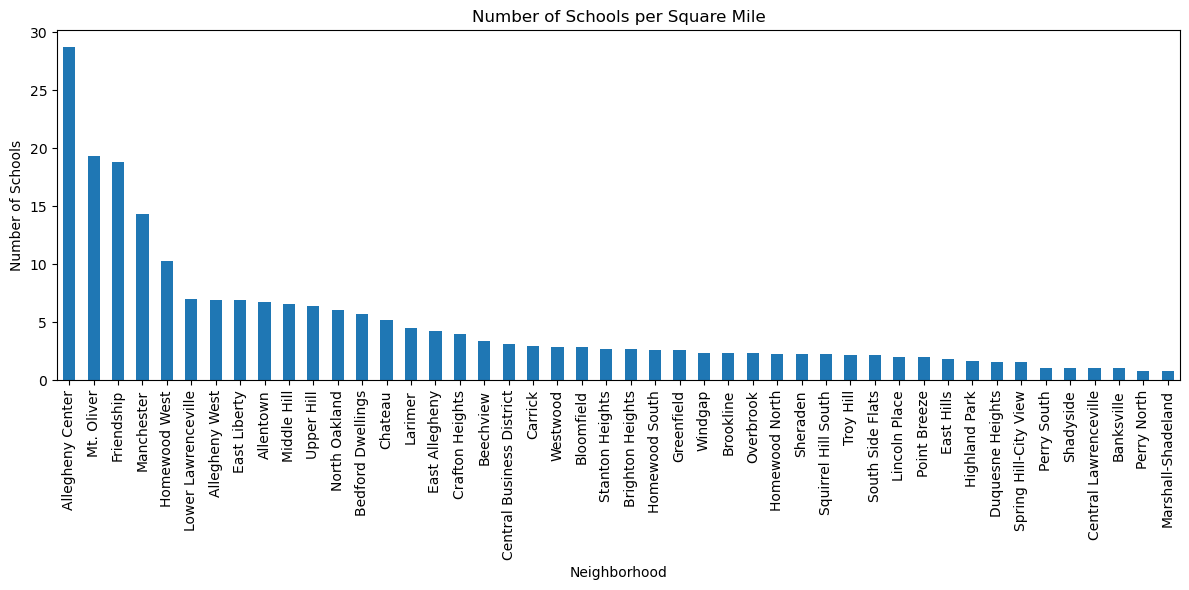

In [5]:
plt.figure(figsize=(12, 6))

final_df.set_index('Neighborhood')['schools_per_sq_mi'] \
    .sort_values(ascending=False) \
    .plot(kind='bar')

plt.xlabel("Neighborhood")
plt.ylabel("Number of Schools")
plt.title("Number of Schools per Square Mile")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Conclusion

Based on the analysis of public school distribution across Pittsburgh neighborhoods, **Squirrel Hill South** stands out as the neighborhood with the highest number of public schools. But as we also have noticed what we considered the most is the concentration of the schools per area as we believe that this is the right metric to judge on. This concentration of educational resources suggests strong accessibility and support for families in the area, making **Allegheny Center** a leading neighborhood in terms of school availability.